In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
ds_burial = pd.read_csv('indigent_burials.csv')

C:\Users\rapid\AppData\Local\Temp\ipykernel_26088\3578726099.py:1: DtypeWarning: Columns (2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,21,22,24,25,26,27,28,29,30,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  ds_burial = pd.read_csv('indigent_burials.csv')


In [3]:
ds_burial.head(20)

,LName,FName,MName,OName,Sex,RaceEthincity,DOB,DOD,DeathYear,DBF,...,City,Location,CityOfBirth,StateOfBirth,SourceURL,DateScraped,LastModified,Misc,isVeteran,MilitaryAffiliation
0,Fetus,NaN,NaN,NaN,NaN,NaN,NaN,11-17-2021,NaN,NaN,...,NaN,Staten Island University Hospital,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN
1,Rezk,Justin,NaN,NaN,NaN,NaN,NaN,01-30-2022,NaN,NaN,...,NaN,NYU Langone Hospital Brooklyn,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN
2,Fetus,NaN,NaN,NaN,NaN,NaN,NaN,01-21-2022,NaN,NaN,...,NaN,NYU Langone Hospital Brooklyn,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN
3,Ruiz,Nasir,NaN,NaN,NaN,NaN,NaN,12-18-2021,NaN,NaN,...,NaN,Wyckoff Heights Medical Center,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN
4,Fetus,NaN,NaN,NaN,NaN,NaN,NaN,12-13-2021,NaN,NaN,...,NaN,SUNY Downstate Medical Center,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN
5,Kibidor,Kiyan,NaN,NaN,NaN,NaN,NaN,01-13-2022,NaN,NaN,...,NaN,Unique Address see comment,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,Amari,NaN,NaN
6,Zhao,Vienna,NaN,NaN,NaN,NaN,NaN,12-31-2021,NaN,NaN,...,NaN,NYU Langone Hospital Brooklyn,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN
7,Xie,NaN,NaN,NaN,NaN,NaN,NaN,12-13-2021,NaN,NaN,...,NaN,Maimonides Medical Center,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN
8,Fetus,NaN,NaN,NaN,NaN,NaN,NaN,11-23-2021,NaN,NaN,...,NaN,SUNY Downstate Medical Center,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN
9,Sinclair,Mateo,NaN,NaN,NaN,NaN,NaN,01-13-2022,NaN,NaN,...,NaN,New York-Presbyterian/Columbia University Medi...,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN


In [4]:
ds_burial.isnull().sum()

LName                      34
FName                   10702
MName                  105097
OName                  118149
Sex                     97948
RaceEthincity          104726
DOB                    104726
DOD                     35963
DeathYear              118786
DBF                    105650
Mortuary               107382
FuneralDirector        110106
CaseNo                  99567
PD                      44767
BD                      27458
BurialYear             118022
CremationNo            111349
isClaimed              117489
GraveSection            37730
GraveLot               110345
GraveNo                 35150
Age                     35489
AgeGroup               108539
Jurisdiction                0
State                  104726
County                 103383
CountyNo               109538
City                   104726
Location                42465
CityOfBirth            118297
StateOfBirth           118386
SourceURL                   0
DateScraped                 0
LastModifi

In [5]:
ds_burial['Death_Year'] = pd.DatetimeIndex(ds_burial['DOD']).year

In [6]:
ds_burial['YBF'] = pd.DatetimeIndex(ds_burial['DBF']).year

In [7]:
ds_burial.head()

,LName,FName,MName,OName,Sex,RaceEthincity,DOB,DOD,DeathYear,DBF,...,CityOfBirth,StateOfBirth,SourceURL,DateScraped,LastModified,Misc,isVeteran,MilitaryAffiliation,Death_Year,YBF
0,Fetus,NaN,NaN,NaN,NaN,NaN,NaN,11-17-2021,NaN,NaN,...,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN,2021.0,NaN
1,Rezk,Justin,NaN,NaN,NaN,NaN,NaN,01-30-2022,NaN,NaN,...,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN,2022.0,NaN
2,Fetus,NaN,NaN,NaN,NaN,NaN,NaN,01-21-2022,NaN,NaN,...,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN,2022.0,NaN
3,Ruiz,Nasir,NaN,NaN,NaN,NaN,NaN,12-18-2021,NaN,NaN,...,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN,2021.0,NaN
4,Fetus,NaN,NaN,NaN,NaN,NaN,NaN,12-13-2021,NaN,NaN,...,NaN,NaN,https://www.hartisland.net/burial_records/sear...,07-27-2022,NaN,NaN,NaN,NaN,2021.0,NaN


In [8]:
fig = px.pie(ds_burial, values=ds_burial['AgeGroup'].value_counts().values, names=ds_burial['AgeGroup'].value_counts().index,
             title='<b>Age Group</b>',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [9]:
fig = px.pie(ds_burial, values=ds_burial['BurialYear'].value_counts().values, names=ds_burial['BurialYear'].value_counts().index,
             title='<b>Burial Year Percentage From 2014 to 2019</b>',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [10]:
age_counts = ds_burial["Death_Year"].value_counts()

fig = px.bar(age_counts, title="Indigents Year of death")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)



fig.show()

In [11]:
year_counts = ds_burial["YBF"].value_counts()

fig = px.bar(year_counts, title="Year of Indigents' Body Found")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)


fig.show()

In [12]:
fig = px.histogram(
    ds_burial,
    x="Death_Year",
    color="Jurisdiction",
    labels={"Close": "Closing Price"},
    title="Distribution of Death Year By Jurisdiction",
    barmode="overlay",
)
fig.show()

In [13]:

# fig = px.pie(ds_burial, values=ds_burial['RaceEthnicity'].value_counts().values, names=ds_burial['RaceEthnicity'].value_counts().index,
#              title='<b>Race Ethnicity</b>',
#             )
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

In [14]:
df3 = pd.DataFrame(ds_burial.groupby('Jurisdiction')['BurialYear'].size())
df3.sort_values(by=['BurialYear'],ascending=True,inplace=True)
fig = px.bar(df3, y='BurialYear', x=df3.index, text_auto='0.3s',
             hover_data=['BurialYear'], color='BurialYear',
             labels={'BurialYear':'Frequency','Jurisdiction':'Jurisdiction'},
             title="<b>Indigents Burial By Jurisdiction</b>")
fig.show()

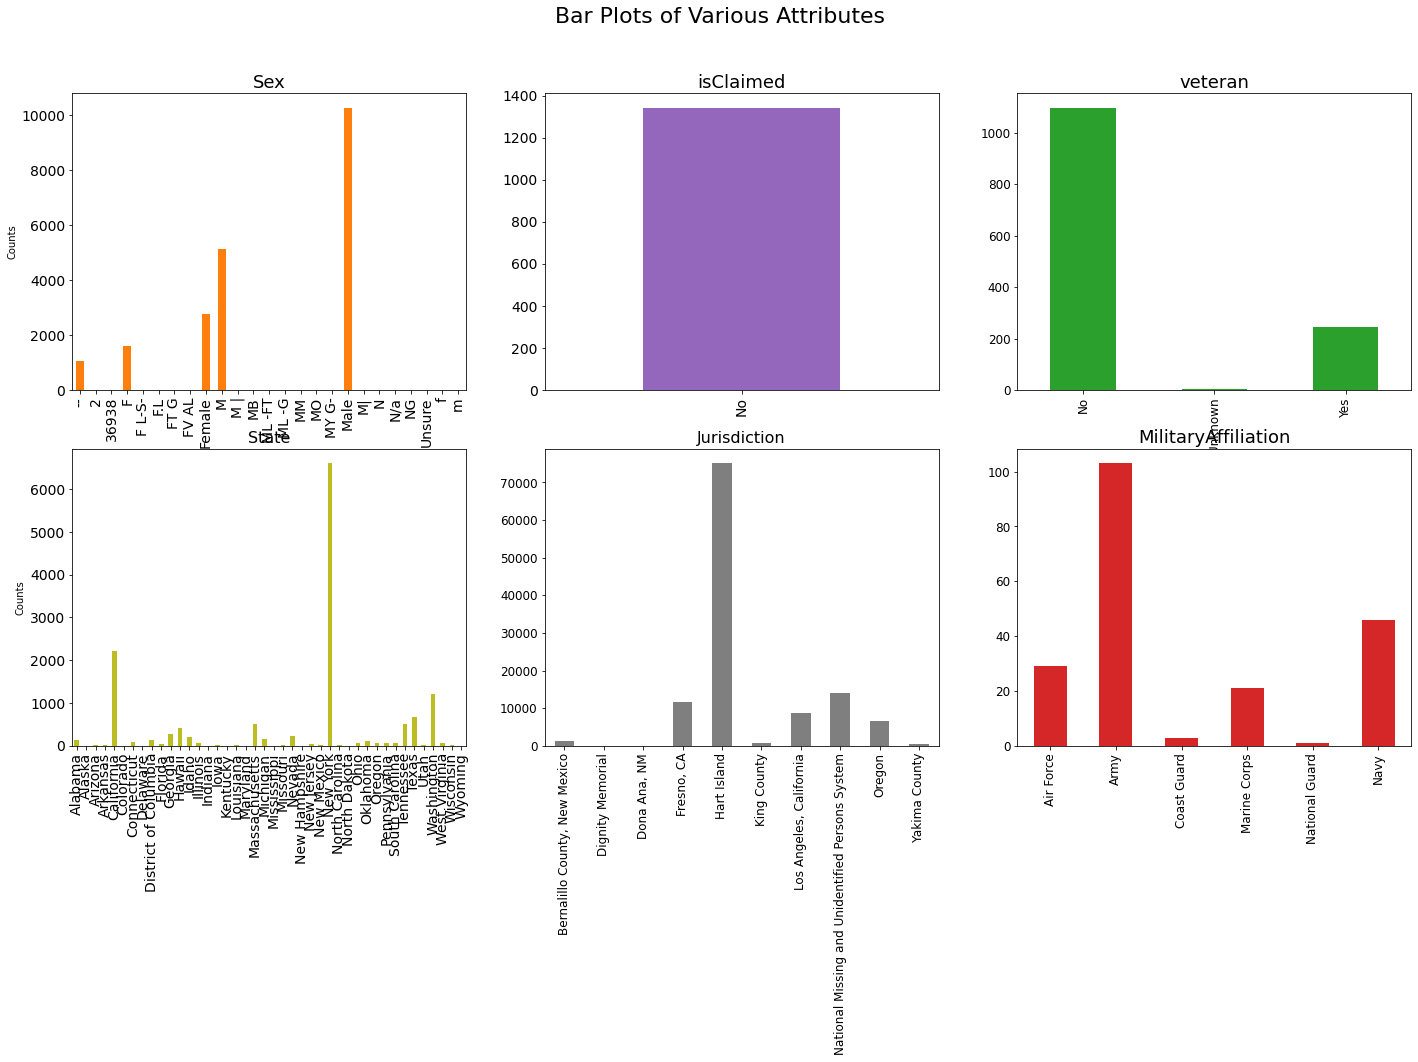

In [15]:
fig, axarr = plt.subplots(2, 3, figsize=(24, 12))
ds_burial['Sex'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=14, color='tab:orange',ylabel='Counts'
)
axarr[0][0].set_title("Sex", fontsize=18)

ds_burial['isClaimed'].value_counts().sort_index().plot.bar(
    ax=axarr[0][1], fontsize=14, color='tab:purple'
)
axarr[0][1].set_title("isClaimed", fontsize=18)


ds_burial['isVeteran'].value_counts().sort_index().plot.bar(
    ax=axarr[0][2], fontsize=12, color='tab:green'
)
axarr[0][2].set_title("veteran", fontsize=18)

plt.subplots_adjust(hspace=.3)


ds_burial['State'].value_counts().sort_index().plot.bar(
    ax=axarr[1][0], fontsize=14, color='tab:olive',ylabel='Counts'
)

axarr[1][0].set_title("State", fontsize=16)

ds_burial['Jurisdiction'].value_counts().sort_index().plot.bar(
    ax=axarr[1][1], fontsize=12, color='tab:grey'
)
axarr[1][1].set_title("Jurisdiction", fontsize=16)


ds_burial['MilitaryAffiliation'].value_counts().sort_index().plot.bar(
    ax=axarr[1][2], fontsize=12, color='tab:red'
)
axarr[1][2].set_title("MilitaryAffiliation", fontsize=18)

fig.suptitle('Bar Plots of Various Attributes', fontsize=22)

plt.subplots_adjust(hspace=.2)

In [16]:
df3 = pd.DataFrame(ds_burial.groupby('MilitaryAffiliation')['Death_Year'].size())
df3.sort_values(by=['Death_Year'],ascending=True,inplace=True)
fig = px.bar(df3, y='Death_Year', x=df3.index, text_auto='0.3s',
             hover_data=['Death_Year'], color='Death_Year',
             labels={'Death_Year':'Frequency','MilitaryAffiliation':'Military Affiliation'},
             title="<b>Number of military affiliation</b>")
fig.show()

In [17]:
df3 = pd.DataFrame(ds_burial.groupby('State')['Death_Year'].size())
df3.sort_values(by=['Death_Year'],ascending=True,inplace=True)
fig = px.bar(df3, y='Death_Year', x=df3.index, text_auto='0.3s',
             hover_data=['Death_Year'], color='Death_Year',
             labels={'Death_Year':'Frequency','MilitaryAffiliation':'Military Affiliation'},
             title="<b>Unclaimed Indigents by States</b>")
fig.show()

In [18]:
fig = px.pie(ds_burial, values=ds_burial['YBF'].value_counts().values, names=ds_burial['YBF'].value_counts().index,
             title='<b>Year Body Found</b>',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [19]:
fig = px.pie(ds_burial, values=ds_burial['RaceEthincity'].value_counts().values, names=ds_burial['RaceEthincity'].value_counts().index,
             title='<b>Race / Ethnicity</b>',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()